In [15]:
%load_ext autoreload
%autoreload 2
import numpy as np
from pathlib import Path
import sys
parentDir = Path.cwd().parent
sys.path.insert(0, str(parentDir))
%matplotlib widget
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from utils.featurize_emg import emg_td_features, features_to_df
from utils.plotting_helpers import plot_feature_by_gesture, plot_feature_mean_sem
from utils.plotting_helpers import plot_feature_heatmap, radar_gesture_signature, pca_scatter

### Load pre-saved epoch data

In [54]:
epoch_data_path = parentDir / "data/processed/ninapro_ex1_win200_ms_step50_ms_exclude_rest.npz"
# epoch_data_path = parentDir / "data/processed/ninapro_ex1_win200_ms_step50_ms.npz"
save_figs = True

In [55]:
data = np.load(epoch_data_path)

X = data['X']
y = data['y']
subject_ids = data['subject_ids']
rep_ids = data['rep_ids']
t0 = data['t0']
coverage = data['coverage']
Fs = data['Fs']
n_channels = data['n_channels']
L = data['L']
Ld = data['Ld']
T_ms = data['T_ms']
S_ms = data['S_ms']
gesture_ids_all = data['gesture_ids_all']
exercise_number = data['exercise_number']
include_rest = data['include_rest']
majority_threshold = data['majority_threshold']
lag_s = data['lag_s']

In [21]:
# # Exclude rest class
# from utils.postprocessing import exclude_rest_class
# X, y, subject_ids, rep_ids = exclude_rest_class(X, y, subject_ids, rep_ids)

In [56]:
print(f"Data shape: X={X.shape}, y={y.shape}, rep_ids={rep_ids.shape}, subject_ids={subject_ids.shape}")
print(f"Unique gestures: {np.unique(y)}")
print(f"Unique subjects: {np.unique(subject_ids)}")
print(f"Unique repetitions: {np.unique(rep_ids)}")

Data shape: X=(358358, 12, 400), y=(358358,), rep_ids=(358358,), subject_ids=(358358,)
Unique gestures: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Unique subjects: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
Unique repetitions: [1 2 3 4 5 6]


### Check class balance

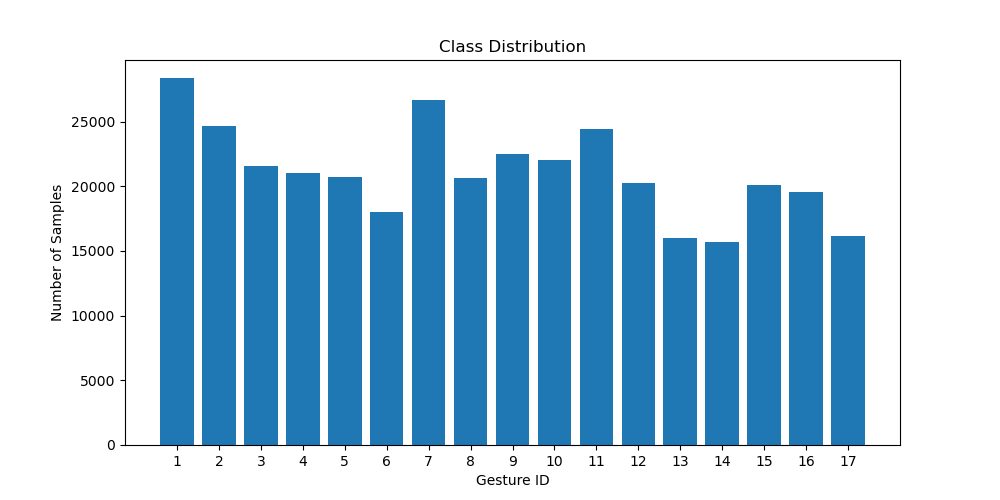

In [57]:
# Class counts
(unique, counts) = np.unique(y[y>0], return_counts=True)
class_counts = dict(zip(unique, counts))
# print("Class counts:", class_counts)
# Plot class distribution as a bar chart
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(list(class_counts.keys()))
plt.xlabel("Gesture ID")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.show()

# Generate classical ML features + DL

In [58]:
emg_features = emg_td_features(X, zc_thresh=0.02, ssc_thresh=0.02, batch_size=20000, flatten=False) # shape (n_samples, n_channels, n_features)
features_df = features_to_df(emg_features, y, subject_ids=subject_ids, rep_ids=rep_ids)

/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/opt/homebrew/Caskroom/miniforge

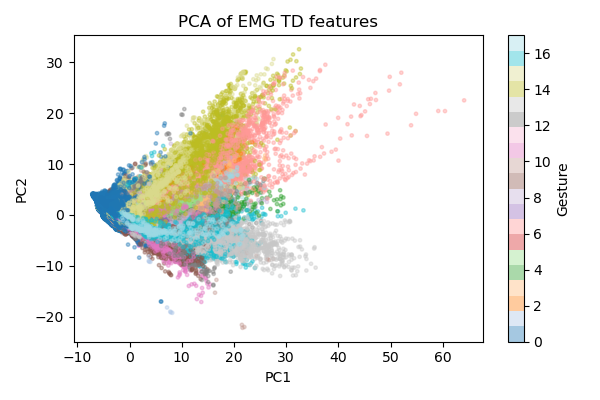

In [49]:
# plot_feature_by_gesture(features_df, feature="RMS", channel=5, figsize=(6, 4))
# plot_feature_mean_sem(features_df, feature="WL", channel=5, figsize=(6, 4))
# plot_feature_heatmap(features_df, feature="SSC", figsize=(6, 4))
# radar_gesture_signature(features_df, channel=5, gestures=[1,6,10,14], figsize=(6, 4))
pca_features = pca_scatter(emg_features, y, figsize=(6, 4))
# if save_figs:
#     plt.savefig(parentDir / "results/figures/feature_visualizations_PCA.png", dpi=300)

In [59]:
from utils.featurize_emg import perform_PCA_on_features
pcs = perform_PCA_on_features(emg_features, n_components=2)

/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/opt/homebrew/Caskroom/miniforge

/var/folders/__/cj7mp8_x5y1_sxsmfdv5pyv00000gn/T/ipykernel_68400/4056468335.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = plt.cm.get_cmap('tab20', len(labels))   # exactly N distinct colors


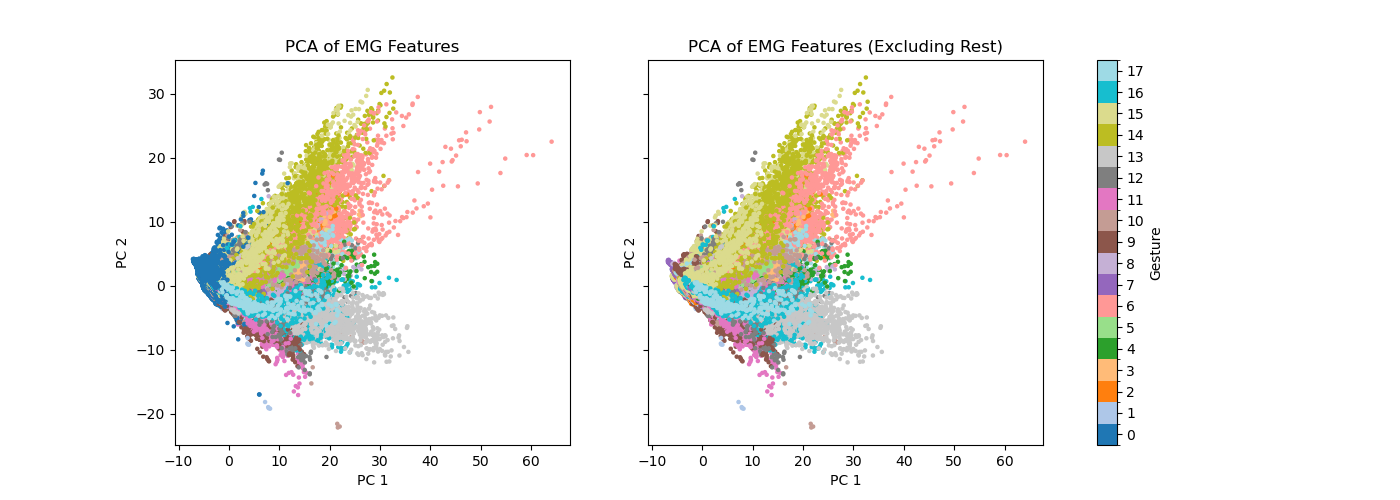

In [ ]:
from matplotlib.colors import ListedColormap, BoundaryNorm

# — Build a stable label→color mapping —
labels = np.sort(np.unique(y))                 # e.g., [0,1,...,17]
base = plt.cm.get_cmap('tab20', len(labels))   # exactly N distinct colors
cmap = ListedColormap(base.colors)

# boundaries centered on integer labels
bounds = np.r_[labels - 0.5, labels[-1] + 0.5]
norm = BoundaryNorm(bounds, cmap.N)

fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)

# With rest
sc0 = axs[0].scatter(pcs[:, 0], pcs[:, 1], c=y, cmap=cmap, norm=norm, s=5)
axs[0].set_xlabel('PC 1'); axs[0].set_ylabel('PC 2')
axs[0].set_title('PCA of EMG Features')

# Without rest
idx = (y != 0)
axs[1].scatter(pcs[idx, 0], pcs[idx, 1], c=y[idx], cmap=cmap, norm=norm, s=5)
axs[1].set_xlabel('PC 1'); axs[1].set_ylabel('PC 2')
axs[1].set_title('PCA of EMG Features (Excluding Rest)')

# One shared colorbar with label ticks at actual gesture IDs
cbar = fig.colorbar(sc0, ax=axs, ticks=labels)
cbar.set_label('Gesture')
# plt.savefig(parentDir / "results/figures/feature_visualizations_PCA.png", dpi=300)
plt.show()

In the PCA of EMG time-domain features, each gesture looks like a short ‘trajectory’ in PC space. Early 200-ms windows cluster near the REST cloud; as the contraction develops, points fan out along PC2 (and PC1) toward a gesture-specific region. If I include REST in the PCA, all gestures appear to share a common origin (the rest centroid). Removing REST keeps the gesture clouds but the ‘launch point’ is less obvious—consistent with the hypothesis that the first few windows of each gesture still resemble rest.

/var/folders/__/cj7mp8_x5y1_sxsmfdv5pyv00000gn/T/ipykernel_68400/2901873271.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = plt.cm.get_cmap('tab20', len(labels))   # exactly N distinct colors
/var/folders/__/cj7mp8_x5y1_sxsmfdv5pyv00000gn/T/ipykernel_68400/2901873271.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = plt.cm.get_cmap('tab20', len(labels))   # exactly N distinct colors


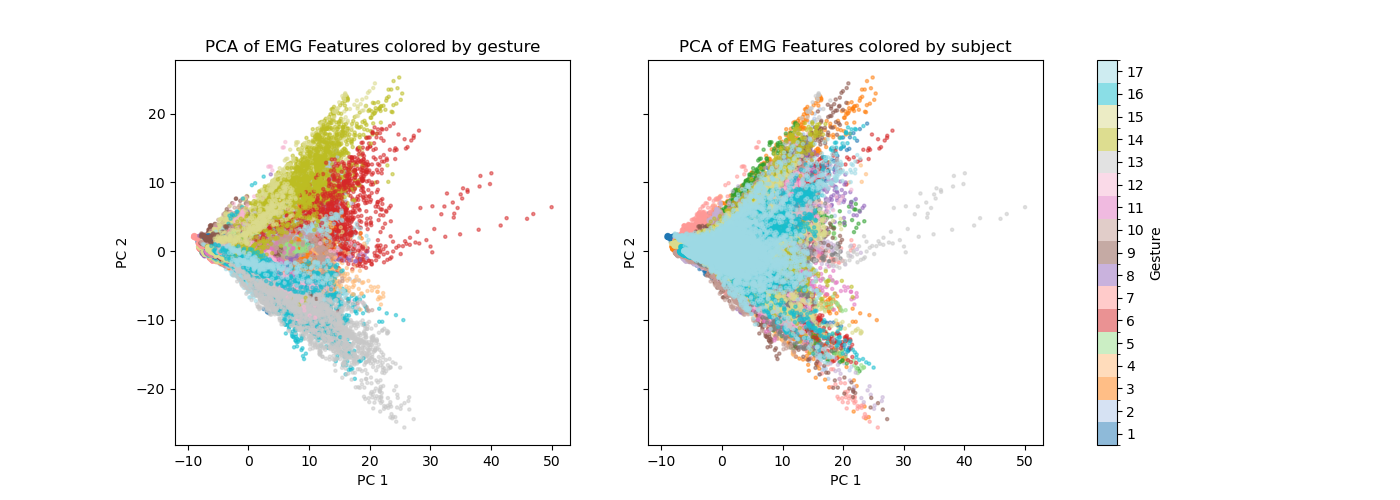

In [87]:
# — Build a stable label→color mapping —
labels = np.sort(np.unique(y))                 # e.g., [0,1,...,17]
base = plt.cm.get_cmap('tab20', len(labels))   # exactly N distinct colors
cmap = ListedColormap(base.colors)

# boundaries centered on integer labels
bounds = np.r_[labels - 0.5, labels[-1] + 0.5]
norm = BoundaryNorm(bounds, cmap.N)

fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)

# gesture based seperation
sc0 = axs[0].scatter(pcs[:, 0], pcs[:, 1], c=y, cmap=cmap, norm=norm, s=5, alpha=0.5)
axs[0].set_xlabel('PC 1'); axs[0].set_ylabel('PC 2')
axs[0].set_title('PCA of EMG Features colored by gesture')

# subject based seperation
labels = np.sort(np.unique(subject_ids))                 # e.g., [0,1,...,17]
base = plt.cm.get_cmap('tab20', len(labels))   # exactly N distinct colors
cmap = ListedColormap(base.colors)

# boundaries centered on integer labels
bounds = np.r_[labels - 0.5, labels[-1] + 0.5]
norm = BoundaryNorm(bounds, cmap.N)

axs[1].scatter(pcs[:, 0], pcs[:, 1], c=subject_ids, cmap=cmap, norm=norm, s=5, alpha=0.5)
axs[1].set_xlabel('PC 1'); axs[1].set_ylabel('PC 2')
axs[1].set_title('PCA of EMG Features colored by subject')

# One shared colorbar with label ticks at actual gesture IDs
cbar = fig.colorbar(sc0, ax=axs, ticks=labels)
cbar.set_label('Gesture')
# plt.savefig(parentDir / "results/figures/feature_visualizations_PCA.png", dpi=300)
plt.show()

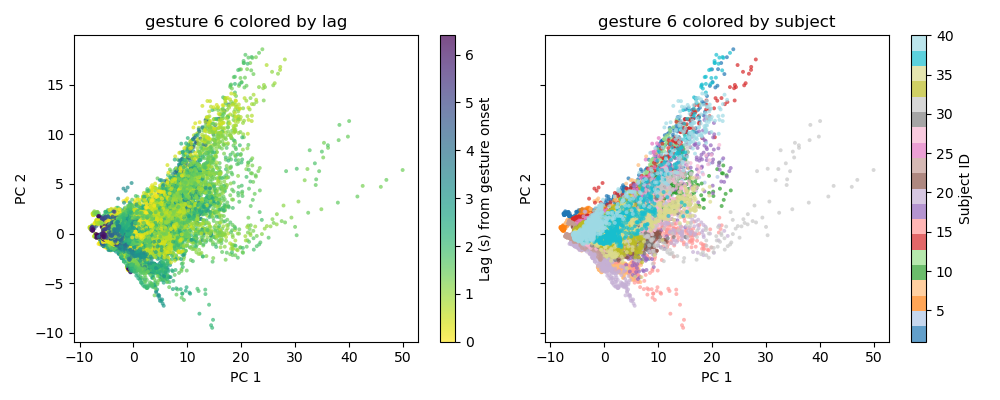

In [81]:
# choose which gesture to visualize
gesture_id = 6  

# mask that gesture
gmask = (y == gesture_id)
Xg = pcs[gmask]               # shape [Ng, 2]
lags = lag_s[gmask].astype(float)
subjs = subject_ids[gmask]

fig, axs = plt.subplots(1,2, figsize=(10,4), sharex=True, sharey=True)


sc = axs[0].scatter(Xg[:,0], Xg[:,1],
                 c=lags,
                 cmap='viridis_r',   # low lag = light, high lag = dark
                 s=8, alpha=0.7, edgecolors='none')

axs[0].set_xlabel('PC 1'); axs[0].set_ylabel('PC 2')
axs[0].set_title(f'gesture {gesture_id} colored by lag')
cbar = plt.colorbar(sc, ax=axs[0])
cbar.set_label('Lag (s) from gesture onset')

sc = axs[1].scatter(Xg[:,0], Xg[:,1],
                 c=subjs,
                 cmap='tab20',   # low lag = light, high lag = dark
                 s=8, alpha=0.7, edgecolors='none')

axs[1].set_xlabel('PC 1'); axs[1].set_ylabel('PC 2')
axs[1].set_title(f'gesture {gesture_id} colored by subject')
# axs[1].set_xlim([-9,15])
# axs[1].set_ylim([-5,15])
cbar = plt.colorbar(sc, ax=axs[1])
cbar.set_label('Subject ID')
plt.tight_layout()
plt.show()


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xf_scaled = scaler.fit_transform(emg_features.reshape(emg_features.shape[0], -1))


In [31]:
from sklearn.model_selection import GroupKFold
import pandas as pd
groups = rep_ids
gkf = GroupKFold(n_splits=6)


In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

models = {
    "LDA": LDA(),
    # "SVM-RBF": SVC(kernel='rbf', C=1, gamma='scale'),
    # "RandomForest": RandomForestClassifier(n_estimators=200, random_state=0)
}

rows=[]
for name, mdl in models.items():
    scores=[]
    for tr, te in gkf.split(Xf_scaled, y, groups if 'groups' in locals() else y):
        mdl.fit(Xf_scaled[tr], y[tr])
        yhat = mdl.predict(Xf_scaled[te])
        scores.append(dict(acc=accuracy_score(y[te],yhat),
                           f1=f1_score(y[te],yhat,average='macro')))
    res=pd.DataFrame(scores).mean().round(3)
    print(f"{name}: acc={res.acc}, f1={res.f1}")
    rows.append(dict(model=name, **res.to_dict()))
pd.DataFrame(rows).to_csv("../results/day10_classical_baselines.csv", index=False)


/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:613: RuntimeWarning: divide by zero encountered in matmul
  X = (
/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:613: RuntimeWarning: overflow encountered in matmul
  X = (
/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:613: RuntimeWarning: invalid value encountered in matmul
  X = (
/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:629: RuntimeWarning: divide by zero encountered in matmul
  self.scalings_ = scalings @ Vt.T[:, :rank]
/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:629: RuntimeWarning: overflow encountered in matmul
  self.scalings_ = scalings @ Vt.T[:, :rank]
/opt/homebrew/Caskroom/minifo

LDA: acc=0.593, f1=0.325


/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:613: RuntimeWarning: divide by zero encountered in matmul
  X = (
/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:613: RuntimeWarning: overflow encountered in matmul
  X = (
/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:613: RuntimeWarning: invalid value encountered in matmul
  X = (
/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:629: RuntimeWarning: divide by zero encountered in matmul
  self.scalings_ = scalings @ Vt.T[:, :rank]
/opt/homebrew/Caskroom/miniforge/base/envs/emg-decode/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:629: RuntimeWarning: overflow encountered in matmul
  self.scalings_ = scalings @ Vt.T[:, :rank]
/opt/homebrew/Caskroom/minifo